## Semester 1 Project Submission

Please fill out:
* Student name: 
* Instructor name: 


# Maanik Gupta

# Maya Sandlin

# Robert Golden

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#Read CSVs for later use
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.csv')
rt_reviews = pd.read_csv('zippedData/rt.reviews.csv')
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv', index_col=0)

#print(movie_gross.info())
#Clean studio, domestic_gross, & foreign_gross
#movie_gross = movie_gross.dropna()
#movie_gross.info()

rt_movie_info = rt_movie_info.dropna()
#Clean synopsis, rating, genre, director, writer, theater_date, dvd_date, runtime 
ratings = []
for rating in rt_movie_info['rating'].dropna():
    ratings.append(rating)

runtime_raw = [] #for freshly-extracted runtimes
runtime_clean = [] #rfor runtime w/o whitespace
box_off_raw = [] #for raw box office sales data
box_off_clean = [] #for box office sales data without commas or whitespace
for val in rt_movie_info['runtime'].str[:3]: #extract first 3 characters, movies under 100 min will have whitespace
    runtime_raw.append(val) 
for val in runtime_raw: #strip whitespace
    runtime_strip = val.replace(' ', '') 
    runtime_clean.append(runtime_strip)
    
for val in rt_movie_info['box_office']:
    box_off_strip = val.replace(',', '')
    box_off_clean.append(box_off_strip)

#create new column 'runtime_clean'
rt_movie_info['runtime_clean'] = runtime_clean
#create new column 'box_office_clean'
rt_movie_info['box_office_clean'] = box_off_clean

#create new dataframe
df2 = rt_movie_info[['runtime_clean','box_office_clean']].copy()
#ensure runtime valuse are recognized as integers
df2['runtime_clean'] = df2['runtime_clean'].astype(int)
#ensure box office slaes values are recognized as integers
df2['box_office_clean'] = df2['box_office_clean'].astype(int)


In [125]:
#Descriptive Stats for Runtime
max1 = df2['runtime_clean'].max()
Q1_3 = df2['runtime_clean'].quantile(q=0.75)
mean1 = df2['runtime_clean'].mean()
med1 = df2['runtime_clean'].median()
std1 = df2['runtime_clean'].std()
Q1_1 = df2['runtime_clean'].quantile(q=0.25)
min1 = df2['runtime_clean'].min()

print('Descriptive Statistics for Runtime')
print('Mean runtime:', mean1)
print('')
print('Maximum runtime:', max1)
print('75th Percentile:', Q1_3)
print('Median runtime:', med1)
print('25th Percentile:', Q1_1)
print('Minimum runtime:', min1)
print('Interquartile Range:', Q1_3-Q1_1)
print('Std. Dev. of runtime:', std1)

print('99.7% of observations should lay between:', mean1-(std1*2), '-',mean1+(std1*2))

print('') #for readability
#Descriptive Stats for Box Office Sales
mean2 = df2['box_office_clean'].mean()
max2 = df2['box_office_clean'].max()
Q2_3 = df2['box_office_clean'].quantile(q=0.75)
med2 = df2['box_office_clean'].median()
Q2_1 = df2['box_office_clean'].quantile(q=0.25)
min2 = df2['box_office_clean'].min()
std2 = df2['box_office_clean'].std()

print('Descriptive Statistics for Box Office Sales')
print('Mean box office sales:', mean2)
print('')
print('Maximum sales:', max2)
print('75th Percentile:', Q2_3)
print('Median sales:', med2)
print('25th Percentile:', Q2_1)
print('Minimum sales:', min2)
print('Std. Dev of Sales:', std2)
print('Interquartile Range:', Q2_3-Q2_1)
print('99.7% of observations should lay between:', mean2-(std2*2), '-', mean2+(std2*2222))

print('') #for readability
print('Correlation Coefficient')      
print(df2.corr()) #calculate Pearson correlation coefficient for variables in df2

#generate a normal distribution where mean1 is avg, sd1 is std dev, and n=235
d1 = np.random.normal(mean1, std1, 235) 
#generate a normal distribution where mean2 is avg, sd2 is std dev, and n=235
d2 = np.random.normal(mean2, std2, 235) 

df2more = df2[df2['runtime_clean'] > 105]
df2less = df2[df2['runtime_clean'] < 105]
print('')
print('Less - Runtime Mean:', df2less['runtime_clean'].mean(), 
      'Box Office Sales Mean:', df2less['box_office_clean'].mean(), 
      'n:', len(df2less))
print('More - Runtime Mean:', df2more['runtime_clean'].mean(),
      'Box Office Sales Mean:', df2more['box_office_clean'].mean(), 
      'n:', len(df2more))
#df2['runtime_clean'].plot.box(grid='True')
#df2['box_office_clean'].plot.box(grid='True')

Descriptive Statistics for Runtime
Mean runtime: 106.66382978723404

Maximum runtime: 188
75th Percentile: 117.0
Median runtime: 105.0
25th Percentile: 93.0
Minimum runtime: 67
Interquartile Range: 24.0
Std. Dev. of runtime: 18.147124581299227
99.7% of observations should lay between: 70.36958062463557 - 142.9580789498325

Descriptive Statistics for Box Office Sales
Mean box office sales: 41958400.02127659

Maximum sales: 368000000
75th Percentile: 52649522.5
Median sales: 15536310.0
25th Percentile: 2302444.5
Minimum sales: 363
Std. Dev of Sales: 62630155.51836797
Interquartile Range: 50347078.0
99.7% of observations should lay between: -83301911.01545934 - 139206163961.8349

Correlation Coefficient
                  runtime_clean  box_office_clean
runtime_clean          1.000000          0.312157
box_office_clean       0.312157          1.000000

Less - Runtime Mean: 92.43103448275862 Box Office Sales Mean: 28014808.870689657 n: 116
More - Runtime Mean: 121.21929824561404 Box Office 

In [130]:
n = 235 #sample size
df = n - 1 #degrees of freedom = sample size - 1

print('df2more variance:')
print(df2more.var())
print('df2less variance:')
print(df2less.var())
print('')
#test relationship between movie length over 105 minutes
t_ind_runtime = stats.ttest_ind(df2more['runtime_clean'], df2less['runtime_clean'], equal_var=False)

print('T-Test runtime:', t_ind_runtime)


df2


df2more variance:
runtime_clean       2.109161e+02
box_office_clean    5.834085e+15
dtype: float64
df2less variance:
runtime_clean       4.836912e+01
box_office_clean    1.802465e+15
dtype: float64

T-Test runtime: Ttest_indResult(statistic=19.119590244740635, pvalue=2.419161504367383e-43)


,runtime_clean,box_office_clean
1,108,600000
6,82,41032915
7,123,224114
15,108,1039869
18,127,20518224
...,...,...
1530,126,72700000
1537,123,1320005
1541,119,25335935
1542,129,1416189


C:\Users\rogolden\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

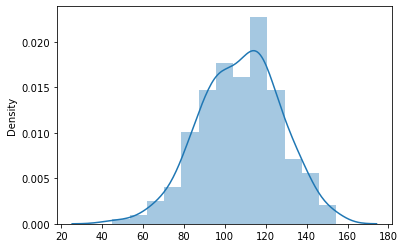

In [84]:
sns.distplot(d1) #distribution for runtime

C:\Users\rogolden\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

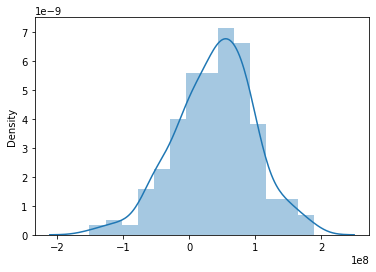

In [352]:
sns.distplot(d2) #distribution for box office sales

C:\Users\rogolden\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rogolden\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

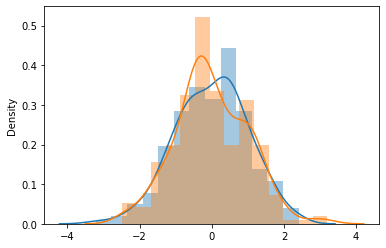

In [82]:
#normalized distribution for runtime
sns.distplot([(x - d1.mean())/d1.std() for x in d1]) 
#normalized distribution for box office sales
sns.distplot([(x - d2.mean())/d2.std() for x in d2])

C:\Users\rogolden\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rogolden\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='runtime_clean', ylabel='box_office_clean'>

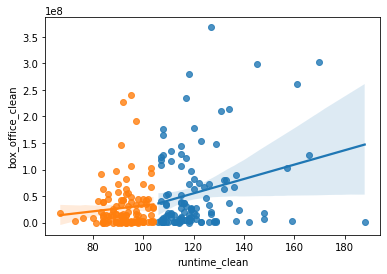

In [121]:
sns.regplot(df2more['runtime_clean'], df2more['box_office_clean'])
sns.regplot(df2less['runtime_clean'], df2less['box_office_clean'])

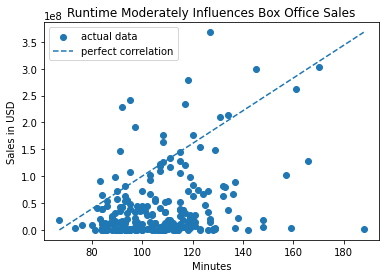

In [116]:
fig, ax = plt.subplots() #Generate Scatter plot 

ax.scatter(df2['runtime_clean'], df2['box_office_clean'], label="actual data")



x_bounds = [min(df2['runtime_clean']), max(df2['runtime_clean'])]
y_bounds = [min(df2['box_office_clean']), max(df2['box_office_clean'])]



ax.plot(x_bounds, y_bounds, "--", label="perfect correlation")



ax.set_title("Runtime Moderately Influences Box Office Sales")
ax.set_xlabel("Minutes")
ax.set_ylabel("Sales in USD")



ax.legend();

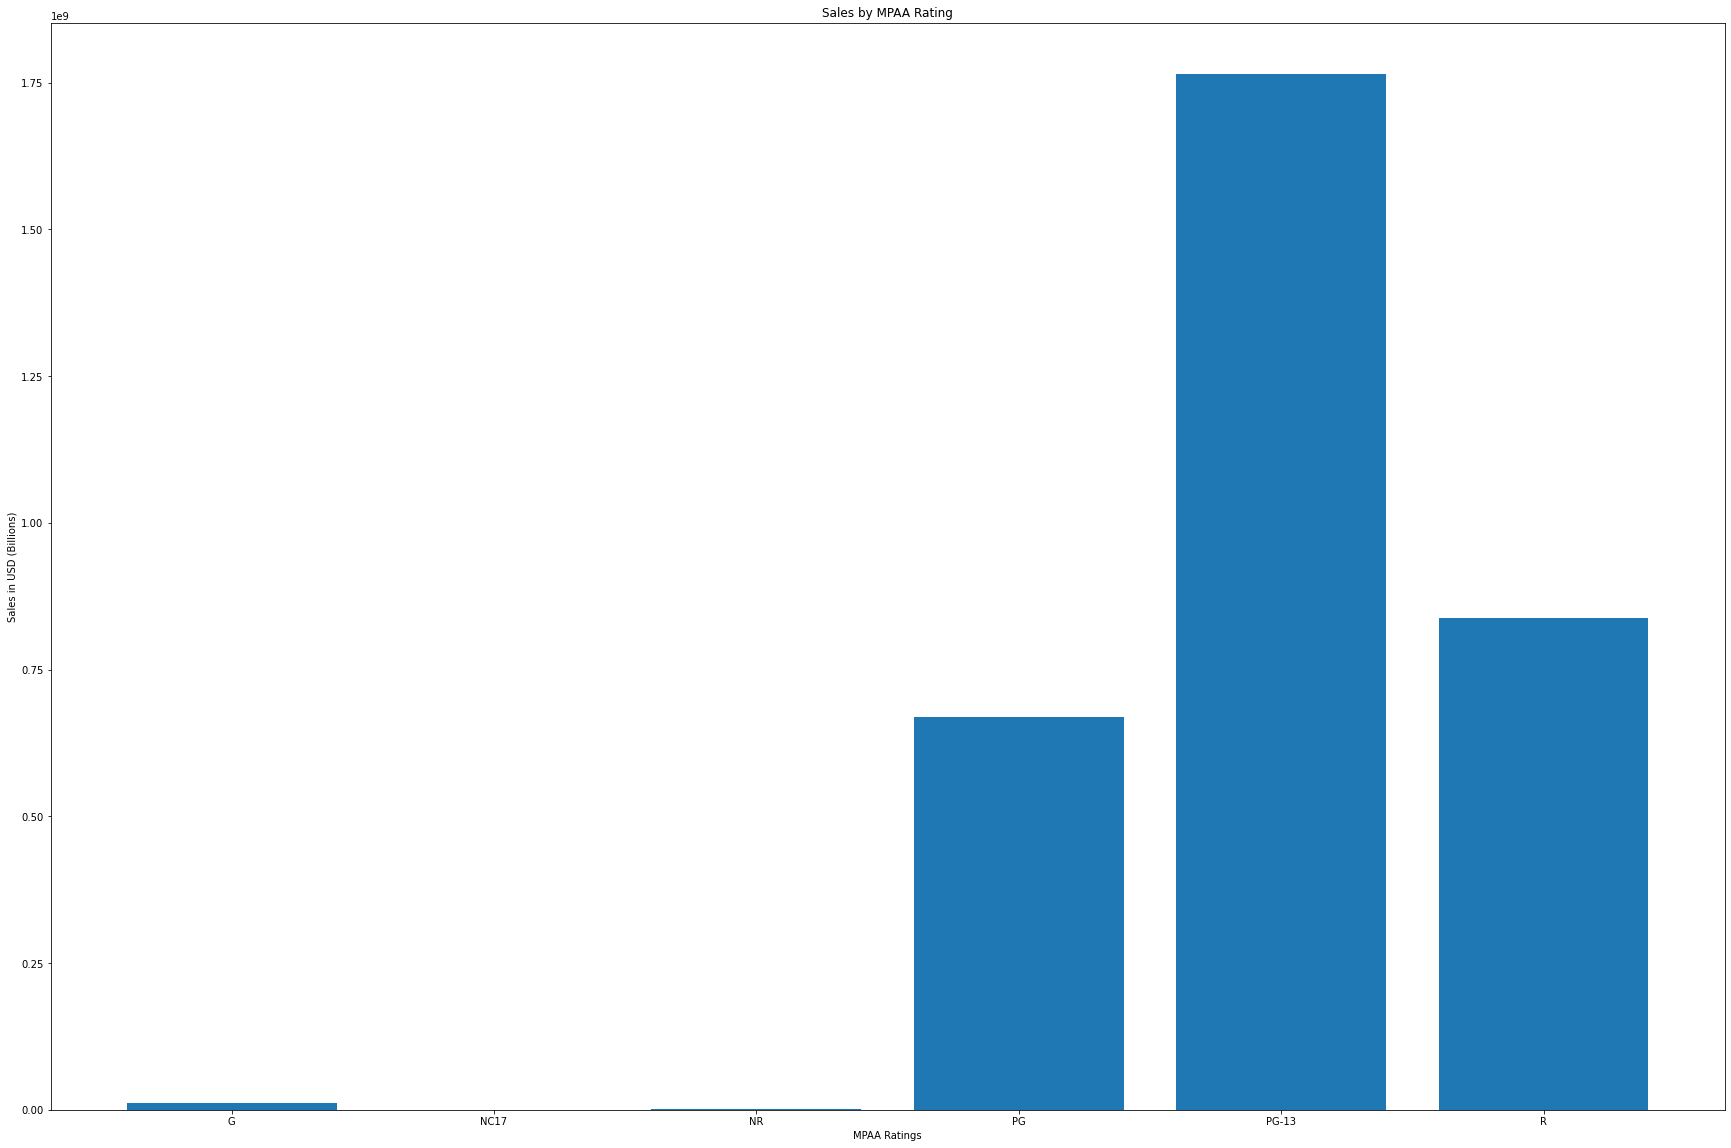

In [168]:
df3 = rt_movie_info[['rating', 'box_office_clean']].copy() #copies rt_movie_info into new dataframe
df3 = df3.dropna() #drops null values

df3['box_office_clean'] = df3['box_office_clean'].astype(int) #ensures box office sales are integers

sales_groupby_rating = df3.groupby('rating')[['box_office_clean']].sum()
sales_groupby_rating = sales_groupby_rating / (10^9)

fig, ax = plt.subplots(figsize=(30,20))
ax.bar(x=sales_groupby_rating.index, height=sales_groupby_rating['box_office_clean'])
plt.title('Sales by MPAA Rating')
plt.xlabel('MPAA Ratings')
plt.ylabel('Sales in USD (Billions)')
plt.show()

# Daniel Robles

# Jake Umholtz 